<a href="https://colab.research.google.com/github/WeraP123/Case-Study-CE880/blob/main/CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import math

In [ ]:
!git clone https://github.com/WeraP123/Case-Study-CE880

Cloning into 'Case-Study-CE880'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
colnames = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
data = pd.read_csv("/content/Case-Study-CE880/data_banknote_authentication.txt", names = colnames, header = None)
data

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Data was collected using the wavelet transformation on the images of the real and fake banknotes. The purpose of this work is to create a classificator capable of robustly detect whether the given banknote is fake or not.

Different preprocessing methods and classification models will be implemented and tested which approach gives the best result.

# Data exploration

Checking for missing values, duplicates and shape of the data

In [ ]:
# chechking for missing data and getting number of rows and columns 
for col in colnames:
    print("Number of Nan values in", col, ": ", data[col].isnull().sum())
print()
print("Observations", data.shape[0]," Variables", data.shape[1])

Number of Nan values in Variance :  0
Number of Nan values in Skewness :  0
Number of Nan values in Kurtosis :  0
Number of Nan values in Entropy :  0
Number of Nan values in Class :  0

Observations 1372  Variables 5


In [ ]:
# checking class counts to determine if there is class imbalance
print("Class counts")
print(data['Class'].value_counts())

Class counts
0    762
1    610
Name: Class, dtype: int64


In [ ]:
# chechking for duplicates in data and getting how many of them are in data set
duplicated = data.duplicated()
print('Number of duplicated data: ', duplicated[duplicated == True].size)

Number of duplicated data:  24


In [ ]:
# removing duplicated obseravtions
data = data.drop_duplicates()

In [ ]:
# information about data types within a data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1348 non-null   float64
 1   Skewness  1348 non-null   float64
 2   Kurtosis  1348 non-null   float64
 3   Entropy   1348 non-null   float64
 4   Class     1348 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.2 KB


In [ ]:
# statistical describtion of each column
data.drop('Class', axis = 1).describe()

,Variance,Skewness,Kurtosis,Entropy
count,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712
std,2.862906,5.868600,4.328365,2.085877
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.786650,-1.627000,-1.545600,-2.393100
50%,0.518735,2.334150,0.605495,-0.578890
75%,2.853250,6.796025,3.199800,0.403863
max,6.824800,12.951600,17.927400,2.449500


# Data visualisation

In [ ]:
# setting overall apperance of the plotted charts
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})

sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})  

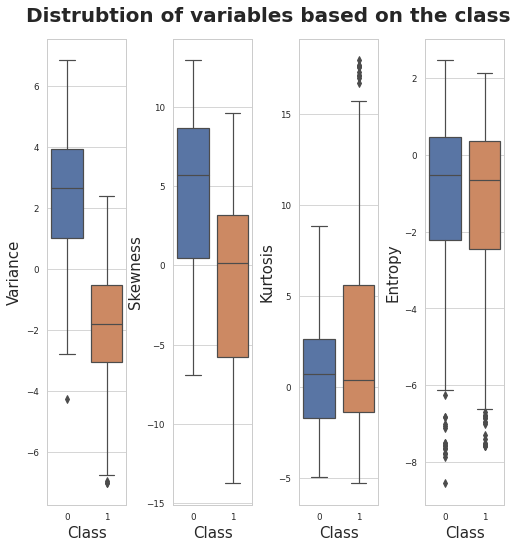

In [ ]:
# plotting each column grouped by the class to check for outliers and the distribution 
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[7,7])

plt.tight_layout(pad=0.6, w_pad=1.2)

sns.boxplot(data=data, x='Class', y ='Variance',ax=axes[0])
sns.boxplot(data=data, x='Class', y ='Skewness',ax=axes[1])
sns.boxplot(data=data, x='Class', y ='Kurtosis',ax=axes[2])
sns.boxplot(data=data, x='Class', y ='Entropy',ax=axes[3])


# adding title to the plot
fig.suptitle("Distrubtion of variables based on the class",fontweight ="bold",x=0.5,y=1.04,fontsize=20)
# saing the figure
plt.savefig('boxplot.png',bbox_inches='tight')
plt.show()


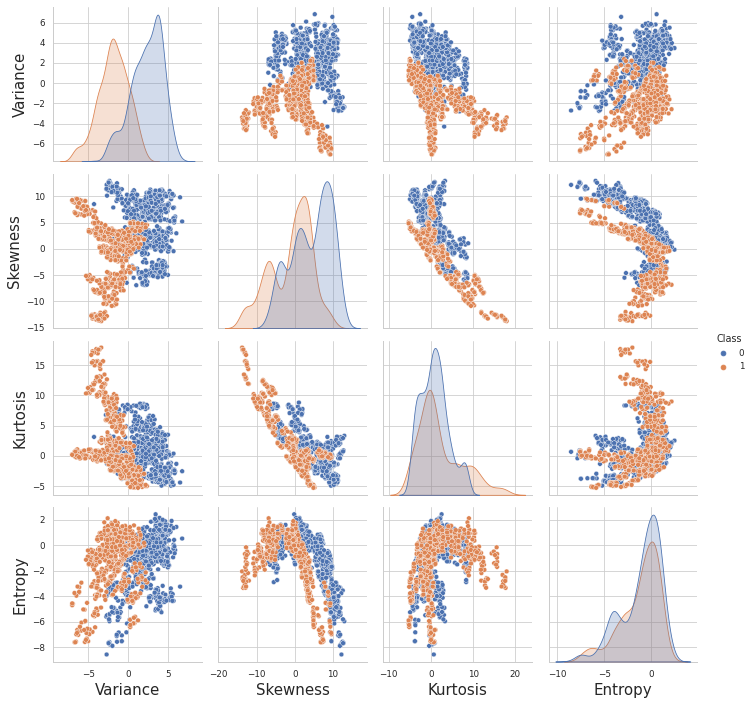

In [ ]:
sns.pairplot(data, hue="Class", diag_kind="kde", height=2.5)
plt.savefig('pairplot.png')

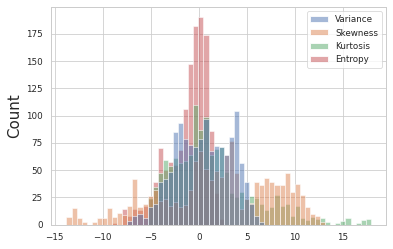

In [ ]:
# distribution of each feature
sns.histplot(data.drop(['Class'], axis = 1))

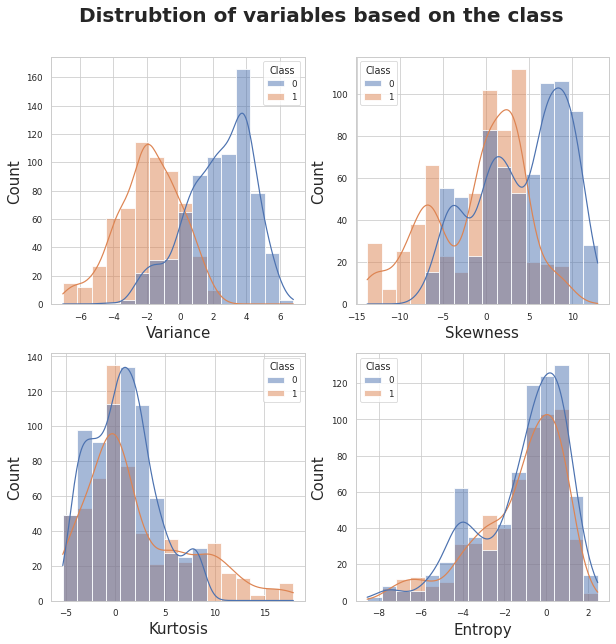

In [ ]:
# plotting distributions based on the class with kde
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[10,10])
#plt.title("Distrubtion of variables based on the class")

sns.histplot(data, x = "Variance", bins = 16, hue ="Class", kde = True,ax=axes[0, 0])

sns.histplot(data, x = "Skewness", bins = 16, hue ="Class", kde = True,ax=axes[0, 1])

sns.histplot(data, x = "Kurtosis", bins = 16, hue ="Class", kde = True,ax=axes[1, 0])

sns.histplot(data, x = "Entropy", bins = 16, hue ="Class", kde = True,ax=axes[1, 1])

fig.suptitle("Distrubtion of variables based on the class",fontweight ="bold",x=0.5,y=0.95,fontsize=20)

plt.savefig('histograms.png')



In [ ]:
# calculating skewness and kurtosis for each feaure
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis


for col in data.drop(['Class'], axis =1 ).columns:
  print(col, "Skewness is ", skew(data[col], axis = 0, bias = True))
  print(col, "Kurtosis is ", kurtosis(data[col], axis = 0, bias = True))

Variance Skewness is  -0.15830965623857957
Variance Kurtossi is  -0.7771174769424292
Skewness Skewness is  -0.40340598547098866
Skewness Kurtossi is  -0.42310613957323806
Kurtosis Skewness is  1.0870318200809672
Kurtosis Kurtossi is  1.2397467405836755
Entropy Skewness is  -1.016053929779414
Entropy Kurtossi is  0.49736195220104973


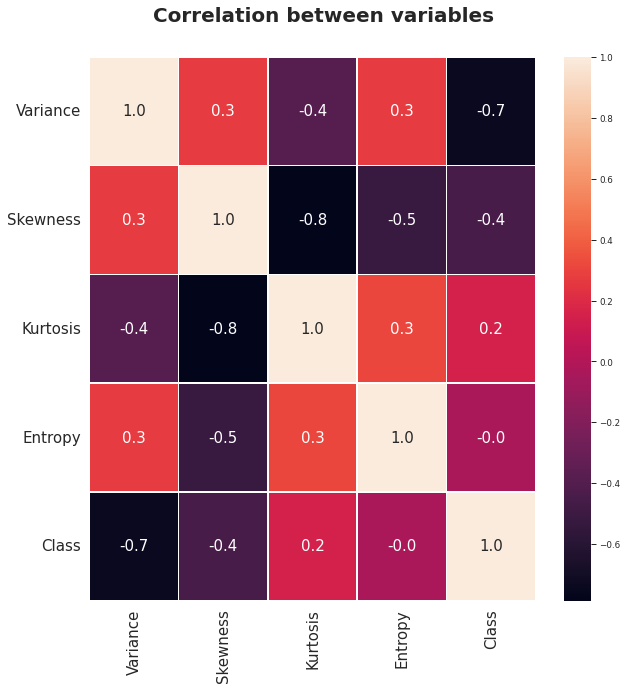

In [ ]:
# checking for linear correlations
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(),annot= True,annot_kws={'size': 15},linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
f.suptitle("Correlation between variables",fontweight ="bold",x=0.45,y=0.95, fontsize=20)
plt.savefig('corr_matrix.png')

# Preprocessing

In [ ]:
data.drop('Class', axis = 1).describe()

,Variance,Skewness,Kurtosis,Entropy
count,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712
std,2.862906,5.868600,4.328365,2.085877
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.786650,-1.627000,-1.545600,-2.393100
50%,0.518735,2.334150,0.605495,-0.578890
75%,2.853250,6.796025,3.199800,0.403863
max,6.824800,12.951600,17.927400,2.449500


In [ ]:
X, y = data.drop(["Class"], axis =1), data["Class"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# SETTING UP PIPELINE

In [ ]:

scalers = [StandardScaler(), MinMaxScaler(), Normalizer(), RobustScaler()]
col_numerical = ["Skewness", "Variance","Entropy", "Kurtosis"]
transformer_numerical = Pipeline(steps = [
    ('num_trans', StandardScaler())
])


classifiers = [LinearRegression(),
    LogisticRegression(max_iter=500, random_state = 42, solver='lbfgs'),
    KNeighborsClassifier(37), # square root of N sampes --> 37
    RandomForestClassifier(random_state=42),
    SVC(kernel='rbf', random_state=0, gamma=0.10, C=1.0),
    XGBClassifier()]

preprocessor = ColumnTransformer(transformers =
    [('numerical', transformer_numerical, col_numerical)])


pipe = Pipeline(steps = [
    ('preprocessor', preprocessor),
    
    ('classifier', None)
])


##MODELS WITH SCALING/NO SCALING

In [ ]:
scores = pd.DataFrame()

In [ ]:
for model in classifiers:
    for num_tr in scalers:
      pipe_params = {
          'preprocessor__numerical__num_trans': num_tr,'classifier': model}
      pipe.set_params(**pipe_params)
       
      
      pipe.fit(X_train, y_train)   
      

      score = pipe.score(X_test, y_test)
 

      param_dict = {
          'model': model.__class__.__name__,
          'num_trans': num_tr.__class__.__name__,
          'score': score
            }
 
      scores = scores.append(pd.DataFrame(param_dict, index=[0]))
 
scores.reset_index(drop=True, inplace=True)

MODEL WITH NO SCALING

In [ ]:
for model in classifiers:
    pipe_params = {'classifier': model}
    pipe.set_params(**pipe_params)
       
    
    pipe.fit(X_train, y_train)   
    
 
    score = pipe.score(X_test, y_test)
 
    param_dict = {
        'model': model.__class__.__name__,
        'score': score,
        'num_trans' : 'None'
            }
    param_dict1 = {
        'score': score,
        'num_trans' : 'None'
            }
    scores = scores.append(pd.DataFrame(param_dict, index=[0]))
scores.reset_index(drop=True, inplace=True)

In [ ]:
print(scores.set_index(['model', 'num_trans']).to_latex(index=True))

\begin{tabular}{llr}
\toprule
              &      &     score \\
model & num\_trans &           \\
\midrule
LinearRegression & StandardScaler &  0.882044 \\
              & MinMaxScaler &  0.882044 \\
              & Normalizer &  0.764185 \\
              & RobustScaler &  0.882044 \\
LogisticRegression & StandardScaler &  0.997753 \\
              & MinMaxScaler &  0.984270 \\
              & Normalizer &  0.995506 \\
              & RobustScaler &  0.997753 \\
KNeighborsClassifier & StandardScaler &  0.995506 \\
              & MinMaxScaler &  0.995506 \\
              & Normalizer &  0.991011 \\
              & RobustScaler &  0.997753 \\
RandomForestClassifier & StandardScaler &  0.991011 \\
              & MinMaxScaler &  0.991011 \\
              & Normalizer &  0.993258 \\
              & RobustScaler &  0.991011 \\
SVC & StandardScaler &  0.997753 \\
              & MinMaxScaler &  0.995506 \\
              & Normalizer &  0.993258 \\
              & RobustScaler &  0.997753 

In [ ]:
scores.sort_values('score', ascending=False)

,model,num_trans,score,time_elapsed
26,LogisticRegression,None,0.997753,0.048064
27,KNeighborsClassifier,None,0.997753,0.009524
16,SVC,StandardScaler,0.997753,0.011608
11,KNeighborsClassifier,RobustScaler,0.997753,0.006055
7,LogisticRegression,RobustScaler,0.997753,0.011374
19,SVC,RobustScaler,0.997753,0.013461
4,LogisticRegression,StandardScaler,0.997753,0.009535
29,SVC,None,0.997753,0.068181
6,LogisticRegression,Normalizer,0.995506,0.009614
8,KNeighborsClassifier,StandardScaler,0.995506,0.006965


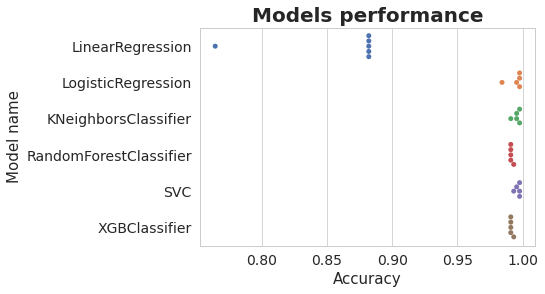

In [ ]:
sns.swarmplot(data=scores, x='score', y='model')
plt.xlabel('Accuracy', fontsize=15);
plt.ylabel('Model name', fontsize=15);
plt.title('Models performance', fontsize=20,fontweight ="bold")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('scores.png',bbox_inches='tight')

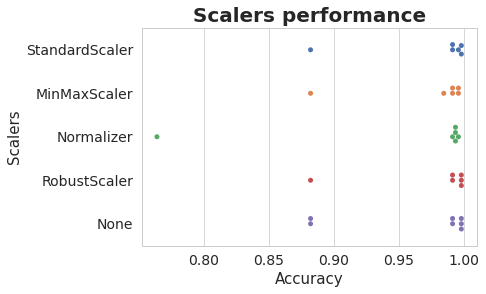

In [ ]:
sns.swarmplot(data=scores, x='score', y='num_trans')
plt.xlabel('Accuracy', fontsize=15);
plt.ylabel('Scalers', fontsize=15);
plt.title('Scalers performance', fontsize=20,fontweight ="bold")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('num_scores.png',bbox_inches='tight')